# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [17]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027204961e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [18]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [23]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0156349876119


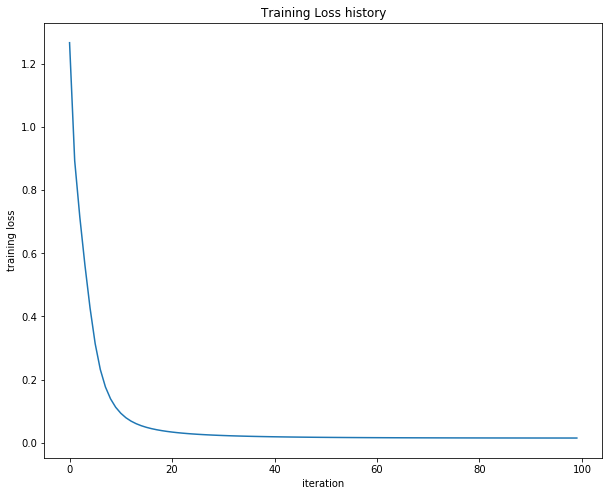

In [31]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [4]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    X_train_full = X_train
    y_train_full = y_train
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train_full -= mean_image
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train_full, y_train_full, X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train_full, y_train_full, X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Full train data shape: ', X_train_full.shape)
print('Full train labels shape: ', y_train_full.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Full train data shape:  (50000, 3072)
Full train labels shape:  (50000,)
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [4]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 99 / 1000: loss 2.302561
iteration 199 / 1000: loss 2.299801
iteration 299 / 1000: loss 2.270084
iteration 399 / 1000: loss 2.174454
iteration 499 / 1000: loss 2.151017
iteration 599 / 1000: loss 2.105723
iteration 699 / 1000: loss 2.026025
iteration 799 / 1000: loss 2.021175
iteration 899 / 1000: loss 1.997400
iteration 999 / 1000: loss 1.939665
Validation accuracy:  0.282


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

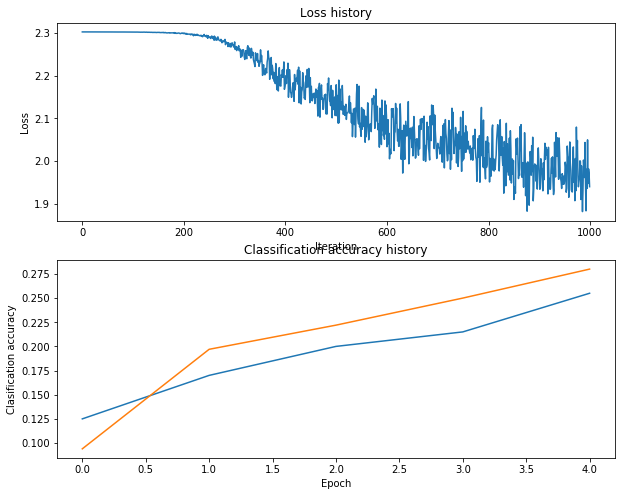

In [5]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [20]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

ValueError: total size of new array must be unchanged

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

Learning rate:  0.0015800894272220579
Regularization strength:  0.24159869969080466
Training accuracy:  0.528510204082
Validation accuracy:  0.504


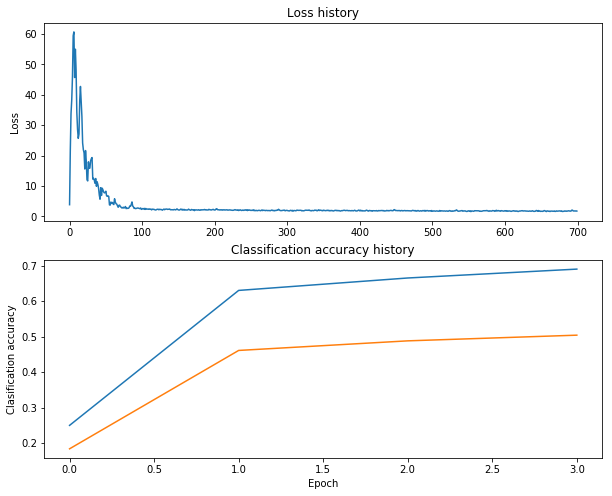

Learning rate:  0.0016845581565362645
Regularization strength:  0.06626251516645071
Training accuracy:  0.524836734694
Validation accuracy:  0.49


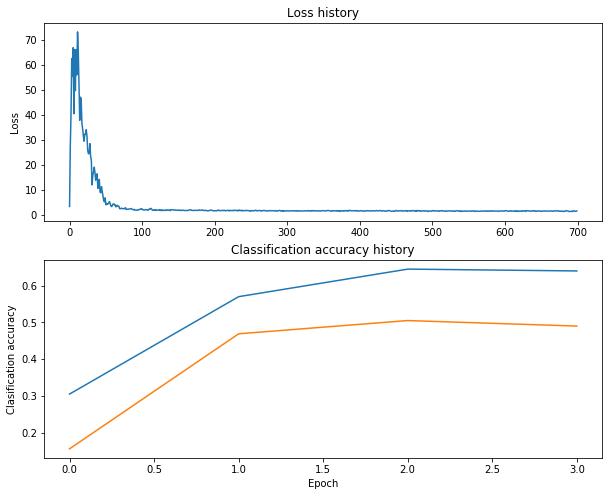

Learning rate:  0.001045828146175527
Regularization strength:  0.053444891145558976
Training accuracy:  0.559979591837
Validation accuracy:  0.502


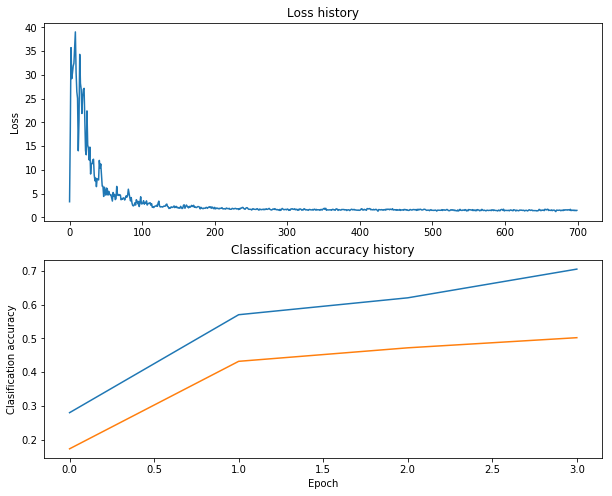

Learning rate:  0.0009663992433485255
Regularization strength:  0.0651746138725343
Training accuracy:  0.565142857143
Validation accuracy:  0.507


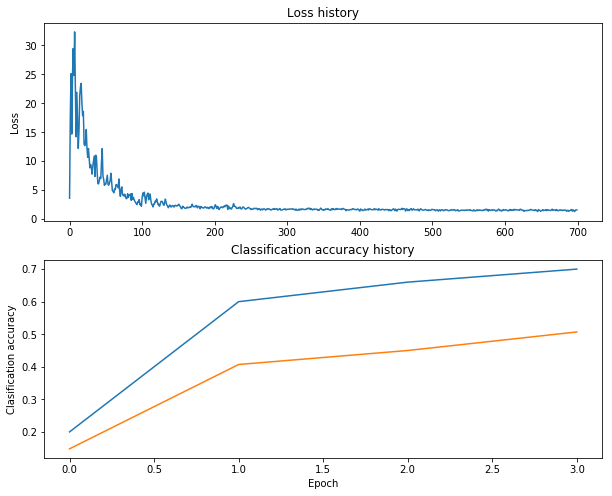

Learning rate:  0.0012820867351156172
Regularization strength:  0.23038587401063343
Training accuracy:  0.549551020408
Validation accuracy:  0.509


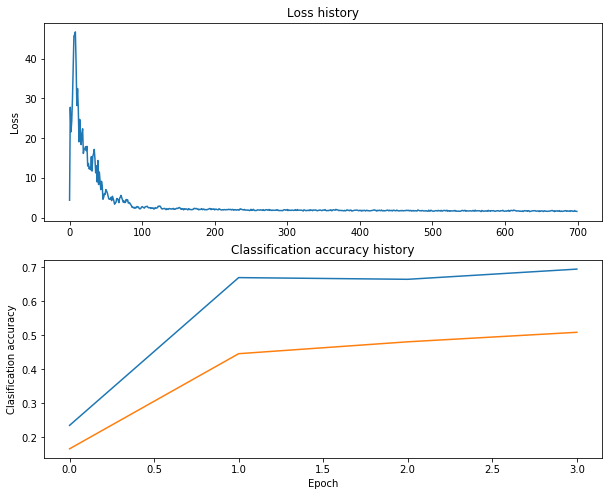

Learning rate:  0.0012002850890317147
Regularization strength:  0.1889492467089457
Training accuracy:  0.553489795918
Validation accuracy:  0.508


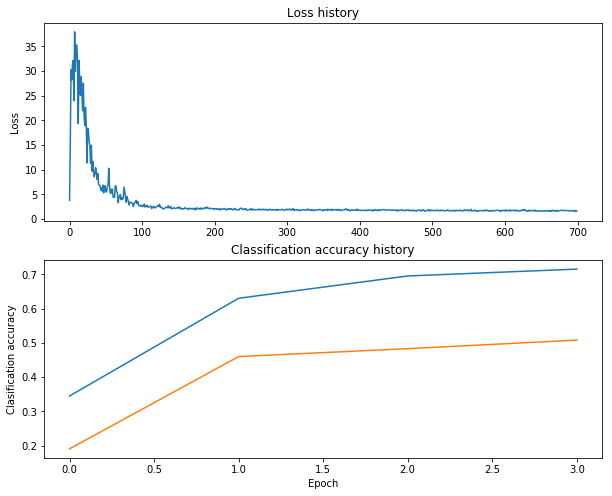

Learning rate:  0.0014780203731719899
Regularization strength:  0.15885759865990456
Training accuracy:  0.545693877551
Validation accuracy:  0.511


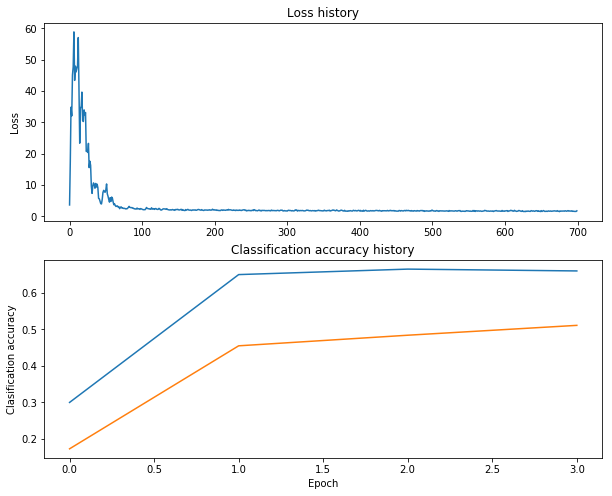

D:\projects\machine-learning\cs231n\assignment1\cs231n\classifiers\neural_net.py:101: RuntimeWarning: divide by zero encountered in log
  data_loss = -np.sum(np.log(probs[range(N), y])) / N


Learning rate:  0.0019846520942298535
Regularization strength:  0.06897608789819783
Training accuracy:  0.519387755102
Validation accuracy:  0.473


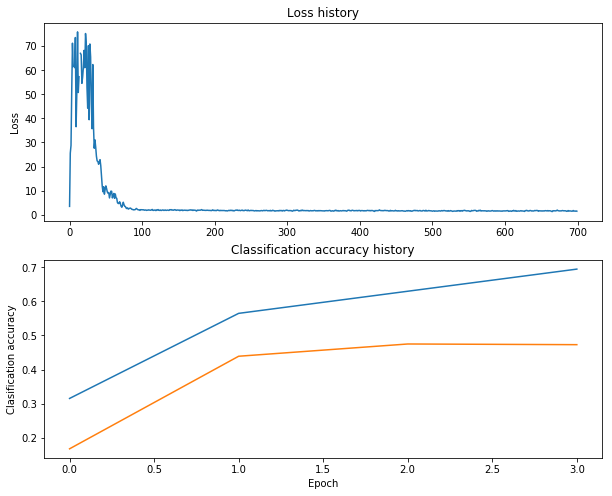

Learning rate:  0.0018449286699864578
Regularization strength:  0.1394686895024189
Training accuracy:  0.532367346939
Validation accuracy:  0.493


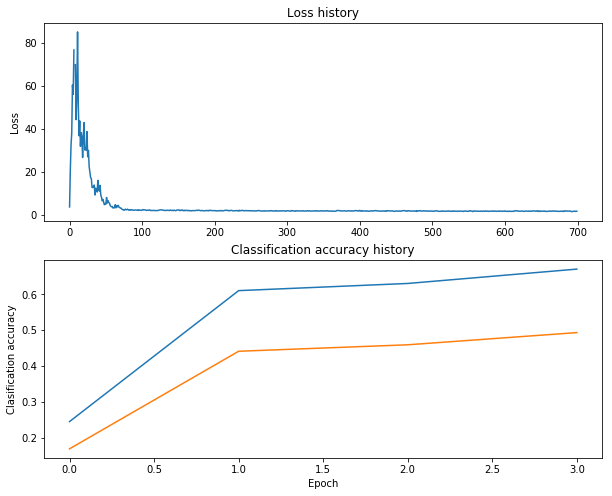

Learning rate:  0.0010479962394484398
Regularization strength:  0.1763524199475926
Training accuracy:  0.552897959184
Validation accuracy:  0.503


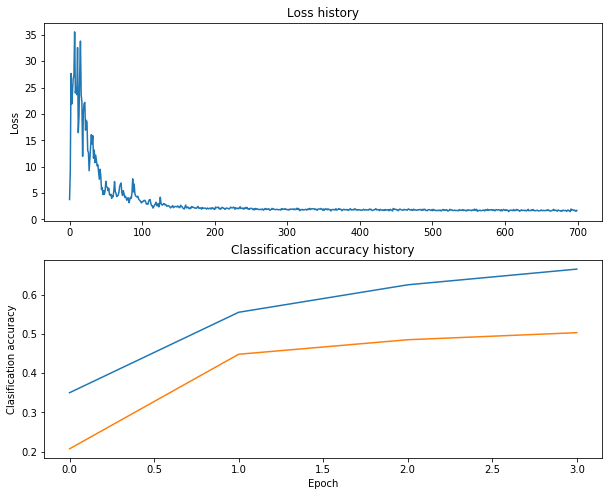

Learning rate:  0.001224452851639516
Regularization strength:  0.10202895064607398
Training accuracy:  0.555897959184
Validation accuracy:  0.52


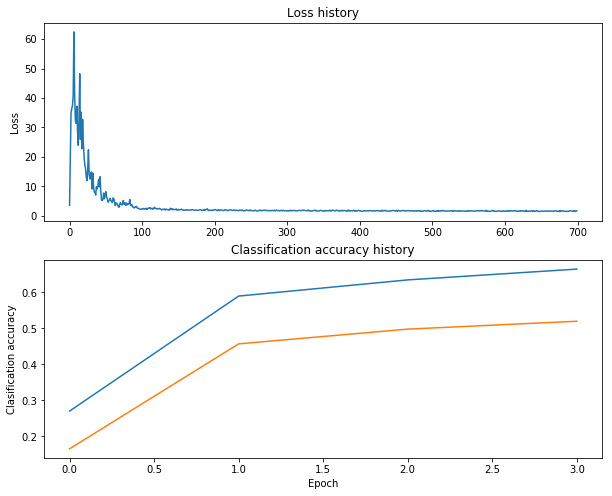

Learning rate:  0.0008539707229771968
Regularization strength:  0.08262751393912368
Training accuracy:  0.556081632653
Validation accuracy:  0.474


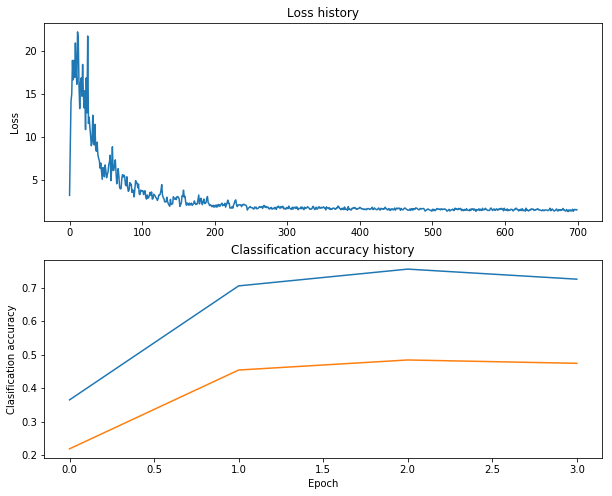

Learning rate:  0.0013230938904435813
Regularization strength:  0.09037688957190214
Training accuracy:  0.537857142857
Validation accuracy:  0.484


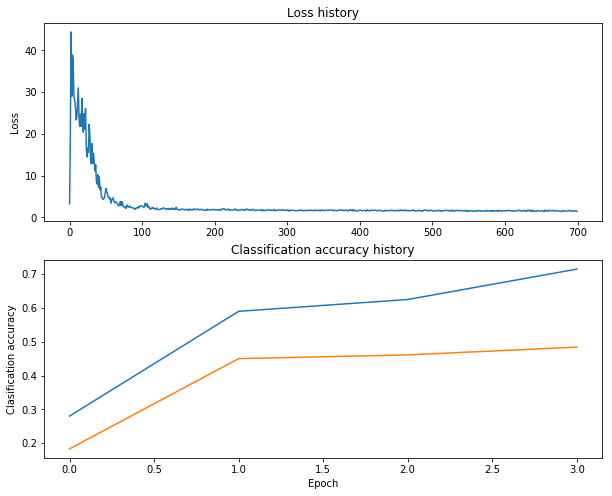

Learning rate:  0.0013184429657206382
Regularization strength:  0.06335560558525431
Training accuracy:  0.557469387755
Validation accuracy:  0.503


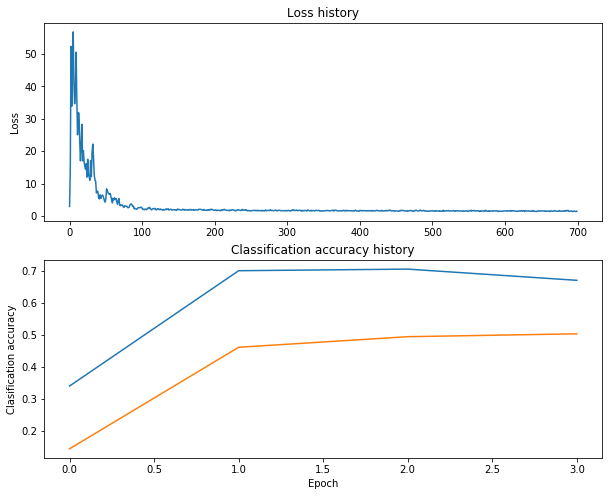

Learning rate:  0.0012260886702047777
Regularization strength:  0.13063638531024369
Training accuracy:  0.504714285714
Validation accuracy:  0.46


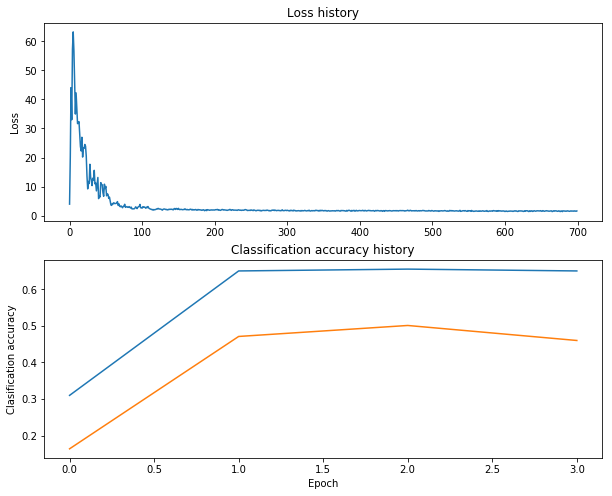

Learning rate:  0.0009914828172796944
Regularization strength:  0.15725120350581007
Training accuracy:  0.558326530612
Validation accuracy:  0.49


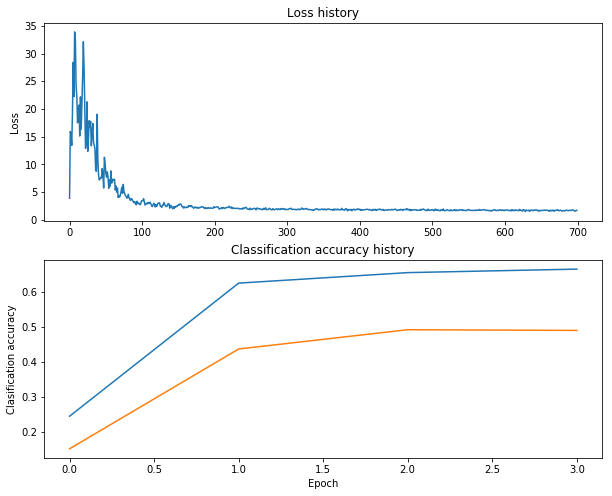

Learning rate:  0.0016397789669244495
Regularization strength:  0.05350840631213534
Training accuracy:  0.537653061224
Validation accuracy:  0.489


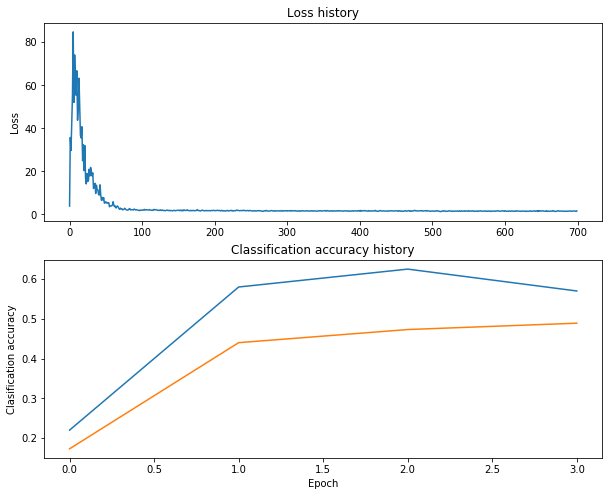

Learning rate:  0.0010767175542873081
Regularization strength:  0.19287333649676558
Training accuracy:  0.54912244898
Validation accuracy:  0.5


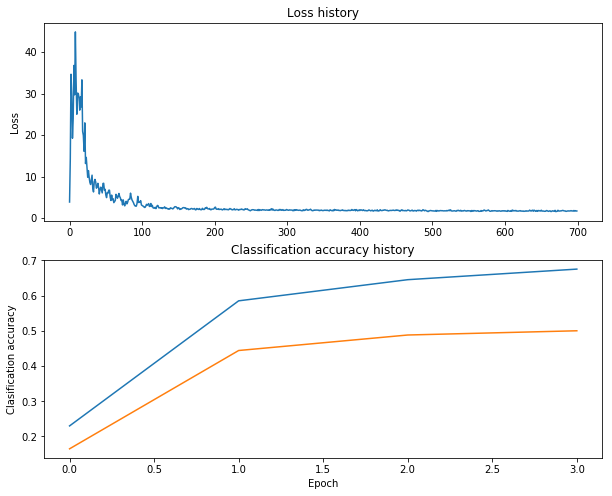

Learning rate:  0.0013195418529858179
Regularization strength:  0.11480392836872984
Training accuracy:  0.529918367347
Validation accuracy:  0.482


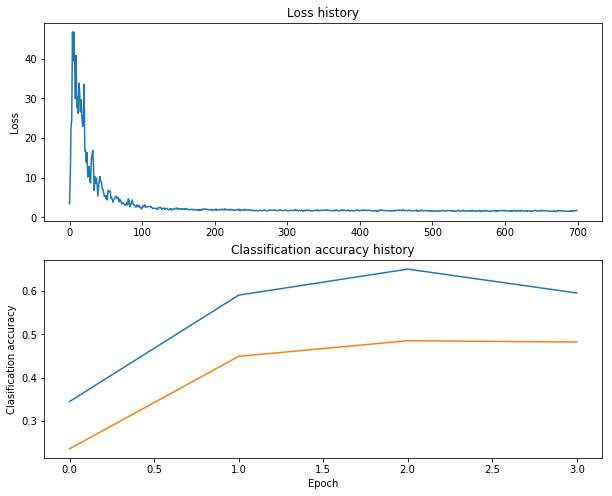

Learning rate:  0.0017202386657669561
Regularization strength:  0.17003947806806208
Training accuracy:  0.525448979592
Validation accuracy:  0.495


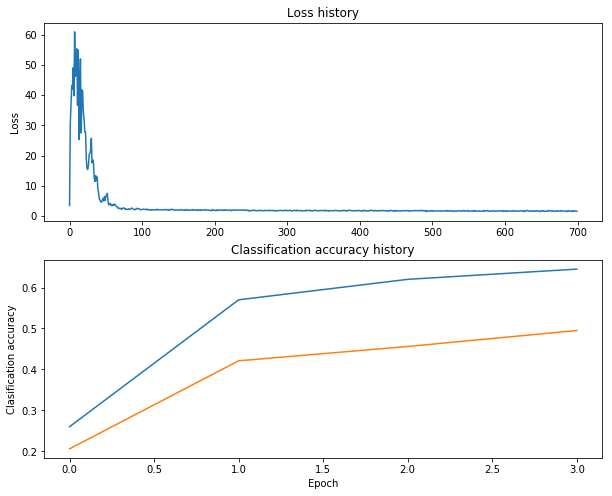

Learning rate:  0.0019661369199872113
Regularization strength:  0.1880090260375053
Training accuracy:  0.519469387755
Validation accuracy:  0.492


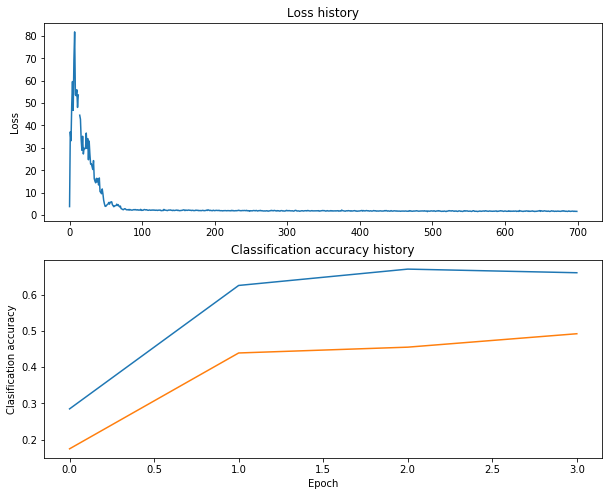

Learning rate:  0.0009170284509213833
Regularization strength:  0.15608748204944012
Training accuracy:  0.560367346939
Validation accuracy:  0.513


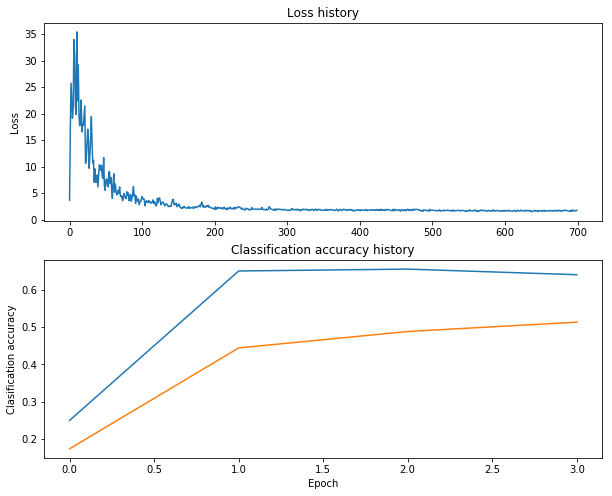

Learning rate:  0.0011209709790775155
Regularization strength:  0.22199779811415904
Training accuracy:  0.559510204082
Validation accuracy:  0.507


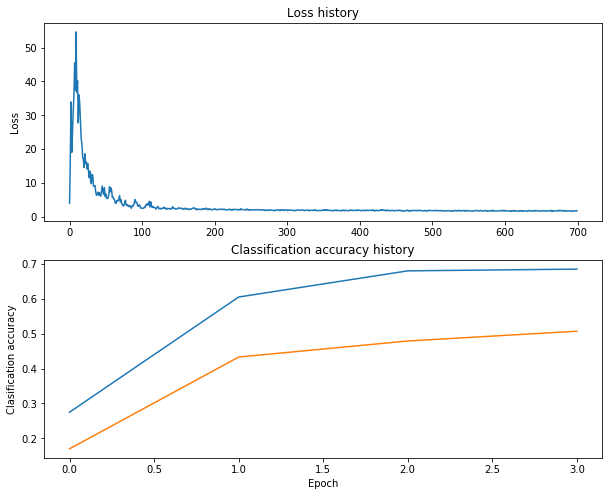

Learning rate:  0.0013022804895628654
Regularization strength:  0.053609090132337195
Training accuracy:  0.521428571429
Validation accuracy:  0.488


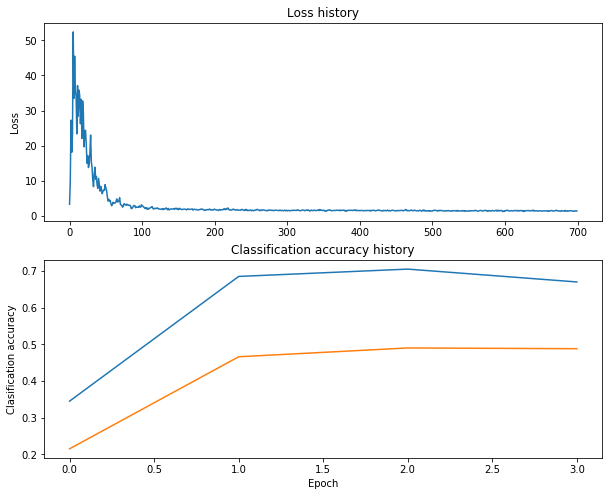

Learning rate:  0.0010375374858584024
Regularization strength:  0.12735255413012186
Training accuracy:  0.566326530612
Validation accuracy:  0.506


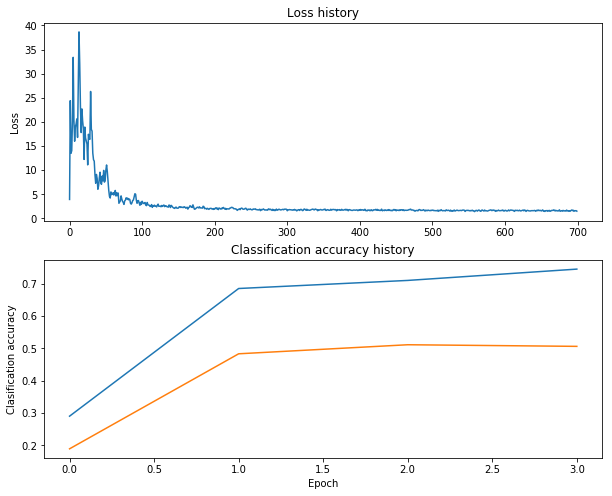

Learning rate:  0.0017632348276082539
Regularization strength:  0.08083756480885936
Training accuracy:  0.541530612245
Validation accuracy:  0.496


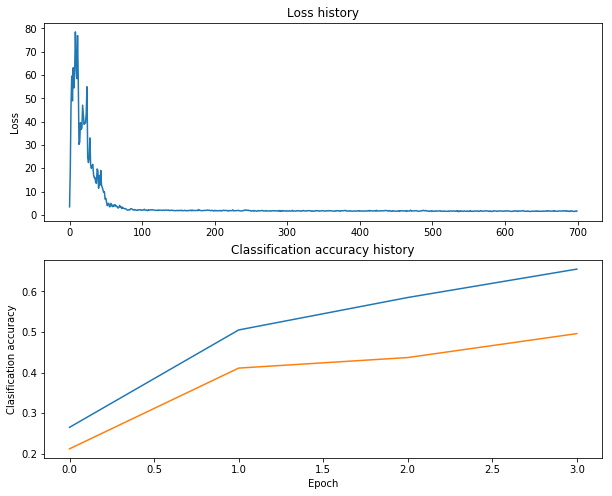

Learning rate:  0.0010205869059764624
Regularization strength:  0.24639518585774112
Training accuracy:  0.551755102041
Validation accuracy:  0.494


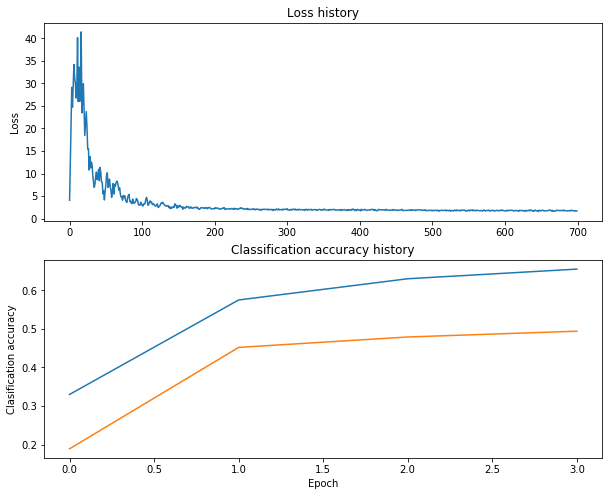

Learning rate:  0.000978423299242424
Regularization strength:  0.13864016517414185
Training accuracy:  0.562367346939
Validation accuracy:  0.502


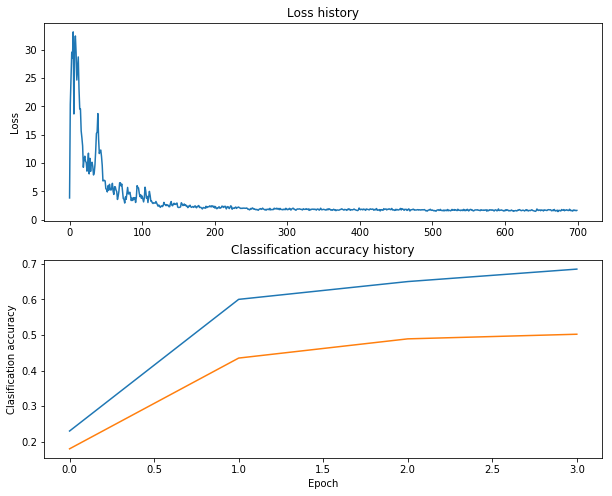

Learning rate:  0.0010409417261026243
Regularization strength:  0.22280012325760457
Training accuracy:  0.553632653061
Validation accuracy:  0.503


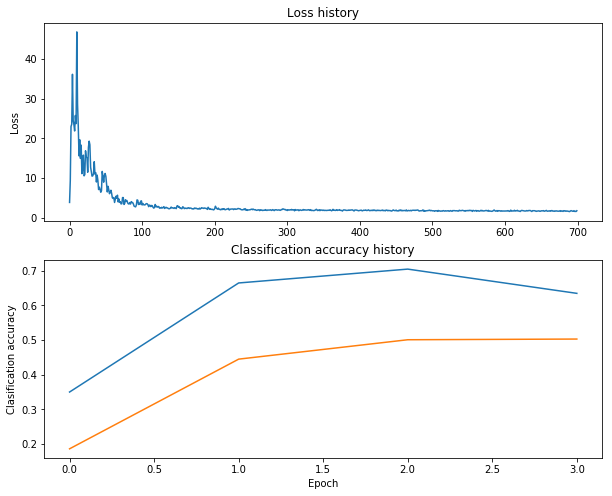

Learning rate:  0.0009749076883608369
Regularization strength:  0.12156679670621283
Training accuracy:  0.555530612245
Validation accuracy:  0.488


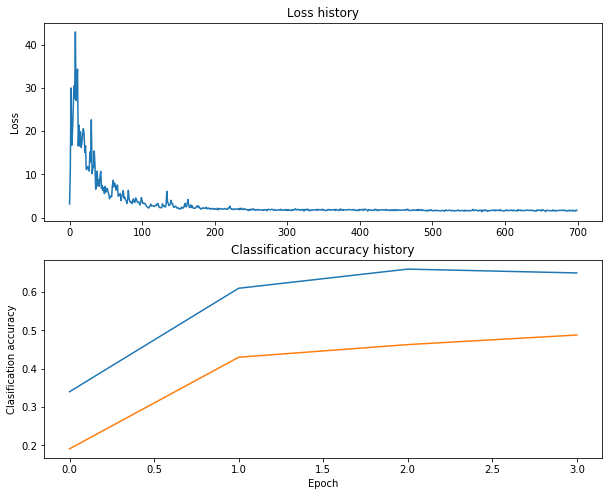

Best validation accuracy:  0.52
Best params:
hidden layer size:  400
learning rate:  0.001224452851639516
regularization strength:  0.10202895064607398
Final training:
Learning rate:  0.001224452851639516
Regularization strength:  0.10202895064607398
Training accuracy:  0.59484
Validation accuracy:  0.593


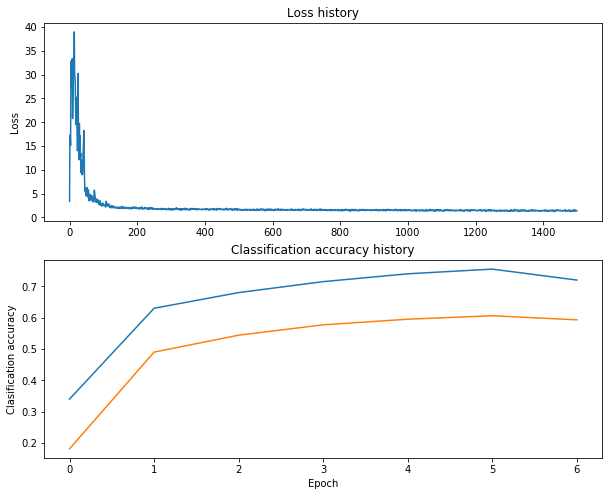

In [18]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best = {
    'val_acc': 0,
    'params': None
}


def show_stats(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()
    
    
def train_net(X, y, num_iters, h_size, lr, reg):
    net = TwoLayerNet(input_size, h_size, num_classes)
    stats = net.train(X, y, X_val, y_val,
        num_iters=num_iters, batch_size=batch_size,
        learning_rate=lr, learning_rate_decay=learning_rate_decay,
        reg=reg, verbose=False)
    
    train_acc = (net.predict(X) == y).mean()
    val_acc = (net.predict(X_val) == y_val).mean()
    
    if val_acc > best['val_acc']:
        best['val_acc'] = val_acc
        best['params'] = (h_size, lr, reg)
    
    print('Learning rate: ', lr)
    print('Regularization strength: ', reg)
    print('Training accuracy: ', train_acc)
    print('Validation accuracy: ', val_acc)
    
    show_stats(stats)
    
    return net
    
input_size = 32 * 32 * 3
num_classes = 10
learning_rate_decay=0.95
batch_size = 200

hidden_sizes = [50, 100, 200, 400]
learning_rates = 10.0 ** np.array(range(-3, -1))
regularization_strengths = 10.0 ** np.array(range(-2, 1))

select_model = True

from itertools import product

if not select_model:
    for params in product(hidden_sizes, learning_rates, regularization_strengths):
        train_net(X_train, y_train, 700, *params)
else:
    for _ in range(30):
        h_size = 400
        lr = np.random.uniform(0.0008, 0.002)
        reg = np.random.uniform(0.05, 0.25)
        train_net(X_train, y_train, 250, h_size, lr, reg)

print('Best validation accuracy: ', best['val_acc'])
print('Best params:')
print('hidden layer size: ', best['params'][0])
print('learning rate: ', best['params'][1])
print('regularization strength: ', best['params'][2])

if select_model:
    print('Final training:')

    best_net = train_net(X_train_full, y_train_full, 500, *best['params'])
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

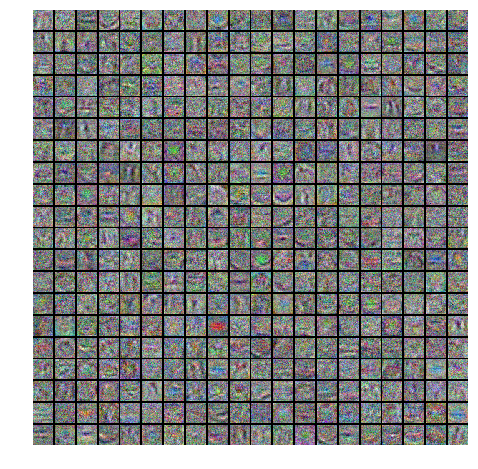

In [21]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [22]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.515
